# K-Means Clustering

**What is Clustering**
The method of identifuing similar group of data in a data set. It basically allows you to automatically split the data into groups according to the similarity. In simple terms,  grouping data is based on similarities.

In [25]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # In this scale we make the values in range between 0 and 1
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

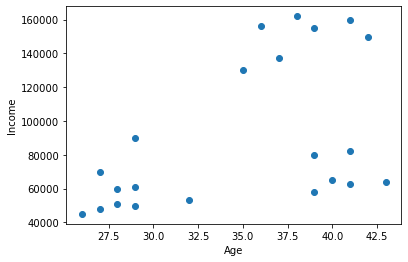

In [6]:
plt.scatter(df.Age , df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age' , "Income($)"]])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [9]:
df['Cluster'] = y_predicted

In [11]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [12]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [13]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

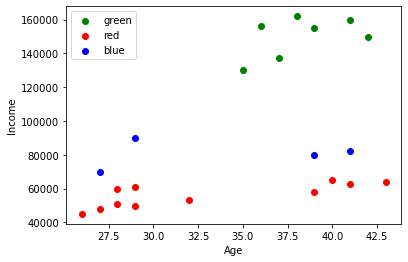

In [24]:
ax1 = plt.scatter(df1.Age , df1['Income($)'] , color = "green")
ax2 = plt.scatter(df2.Age , df2['Income($)'] , color = "red")
ax3 = plt.scatter(df3.Age , df3['Income($)'] , color = "blue")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend([ax1, ax2, ax3 ],['green' , 'red' , 'blue'])

In [27]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])
scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [28]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age' , "Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [29]:
df['Cluster'] = y_predicted

In [31]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [32]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [34]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

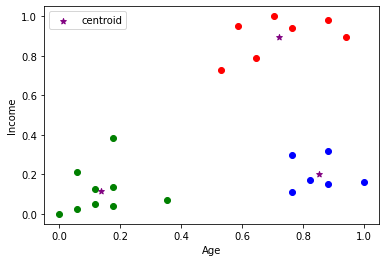

In [41]:
ax1 = plt.scatter(df1.Age , df1['Income($)'] , color = "green")
ax2 = plt.scatter(df2.Age , df2['Income($)'] , color = "red")
ax3 = plt.scatter(df3.Age , df3['Income($)'] , color = "blue")
plt.scatter(km.cluster_centers_[: ,0] , km.cluster_centers_[: , 1],color = 'purple' , marker = '*' , label = 'centroid')
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [42]:
inertia = []
K_range = range(1,10)
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age' , 'Income($)']])
    inertia.append(km.inertia_)

C:\Users\Ameen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
inertia

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.21066678488010518,
 0.16858512236029757,
 0.13265419827245162,
 0.10497488680620906]

**Inertia measures the clustering quantity**
- Measures how spread out the clusters are (Lower is better)
- Distance from each sample to centroid of its cluster
- After fit(), available as attribute inertia_
- KMeans attempts to minimize the inertia when choosing clusters
**More Clusters means lower Inertia**

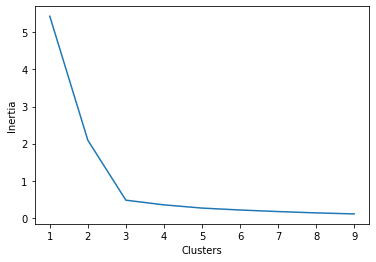

In [46]:
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.plot(K_range, inertia)

## How many clusters to choose?
- A good clustering has tight clusters (So low inertia) but not too many clusters
- Choose an **ELBOW** in the inertia plot
- Where inertia begins to decrease more slowly
[Here we have 3 Clusters]